# Load Packages

In [8]:
import os
import sys, importlib

In [9]:
from dotenv import load_dotenv
# Load Session Id vom .env file to environment variables
load_dotenv()

True

In [2]:
import pandas as pd

In [10]:
os.environ.get('PATH_EXPLORATORY_ANALYSIS')

'/Users/ezratampubolon/PythonProjects/exploratory-analysis'

In [7]:
os.environ.get('PATH_EXPLORATORY_ANALYSIS')

In [12]:
# Append the path to the exploratory-analysis package and import
sys.path.append(os.environ.get('PATH_EXPLORATORY_ANALYSIS'))
import exploratory_analysis as ea

# Load Data

In [13]:
data_folder_path=os.environ.get('DATA_PATH')
loan_data_path=os.path.join(data_folder_path,"loan_data.csv")

In [14]:
# Import data
df = ea.import_to_pds(loan_data_path)
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Names of the columns need to be changed as they may contain a dot. Correspondingly we replace the dot by '_'.

In [15]:
df=ea.transform_col_nm(df,how="replace",what_char=".",by_char="_")
print(f"Column names after name transformation are: {', '.join(list(df.columns))}")

Column names after name transformation are: credit_policy, purpose, int_rate, installment, log_annual_inc, dti, fico, days_with_cr_line, revol_bal, revol_util, inq_last_6mths, delinq_2yrs, pub_rec, not_fully_paid


Column description:
| Column   |      Description       |
|----------|:----------------------:|
| credit_policy |  If the customer meets the credit underwriting criteria of LendingClub.com, and otherwise.|
| purpose |    The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", ...)  |
| int_rate | The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11).|
| installment | The monthly installments owed by the borrower if the loan is funded. |
| log_annual_inc | The natural log of the self-reported annual income of the borrower. |
| dti | The debt-to-income ratio of the borrower (amount of debt divided by annual income). |
| fico | The FICO credit score of the borrower.|
| days_with_cr_line | The number of days the borrower has had a credit line. |
| revol_bal | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). |
| revol_util | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| inq_last_6mths| The borrower's number of inquiries by creditors in the last 6 months. |
| delinq_2yrs | The number of times the borrower had been 30+ days past due on a payment in the past 2 years. |
| pub_rec | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments). |
| not_fully_paid | Not fully paid. |

# Basic Analysis

In [8]:
basic_analysis_result=ea.basic_analysis_df(df)
df_basic_analysis=basic_analysis_result["df_info"]
num_cols=basic_analysis_result["num_cols"]
num_rows=basic_analysis_result["num_rows"]

In [9]:
df_basic_analysis

,col_nm,type,num_unique,num_null
0,credit_policy,int64,2,0
1,purpose,object,7,0
2,int_rate,float64,249,0
3,installment,float64,4788,0
4,log_annual_inc,float64,1987,0
5,dti,float64,2529,0
6,fico,int64,44,0
7,days_with_cr_line,float64,2687,0
8,revol_bal,int64,7869,0
9,revol_util,float64,1035,0


In [10]:
print(f"Number of data: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of data: 9578
Number of columns: 14


First observations:
* No null entries -> Data is clean. No further processing needed for handling gaps in the data.
* No unique identifier for each data
* Possible categorical data to be one-hot-encoded: purpose

# Further Preprocessing
One-hot-encode categorical data

In [11]:
# Columns to one-hot-encode 
li_one_hot=["purpose"]
one_hot_result=ea.one_hot_encode(df_input=df,li_one_hot=li_one_hot)
df=one_hot_result["df_result"]
dummies_dict=one_hot_result["dummies_dict"]

In [12]:
df.head(5)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [13]:
df.columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [14]:
for key,item_vector in dummies_dict.items():
    print(f"The column {key} has been one-hot-encoded yielding the new columns: {item_vector}")

The column purpose has been one-hot-encoded yielding the new columns: ['purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']


# Correlation Analysis

## Threshold = 0.1

In [15]:
CorrelationFeatures=ea.CorrelationFeatures(df_input=df,dummies_dict=dummies_dict).filter_correlations(threshold_absolute_correlation=0.1)

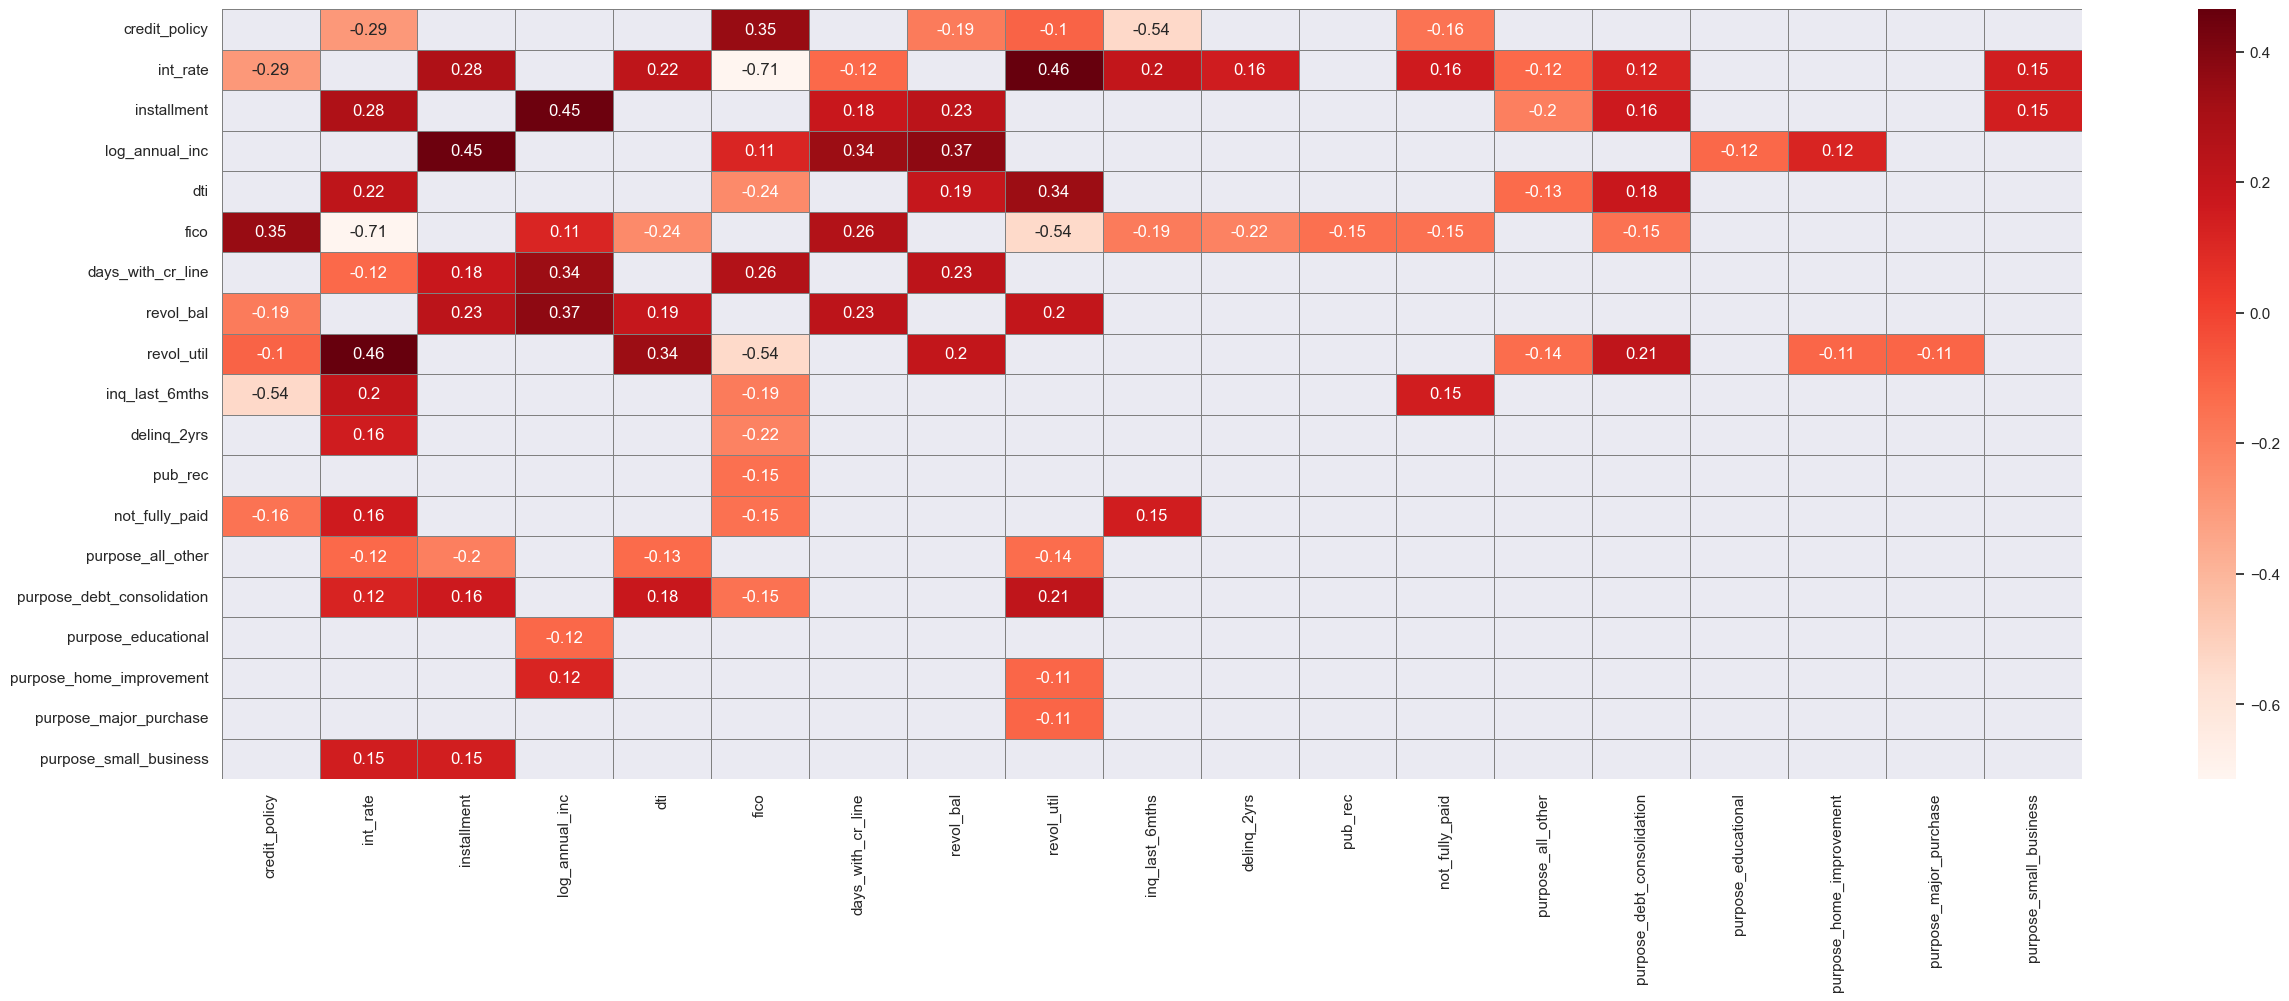

In [16]:
CorrelationFeatures.show_heat_map()

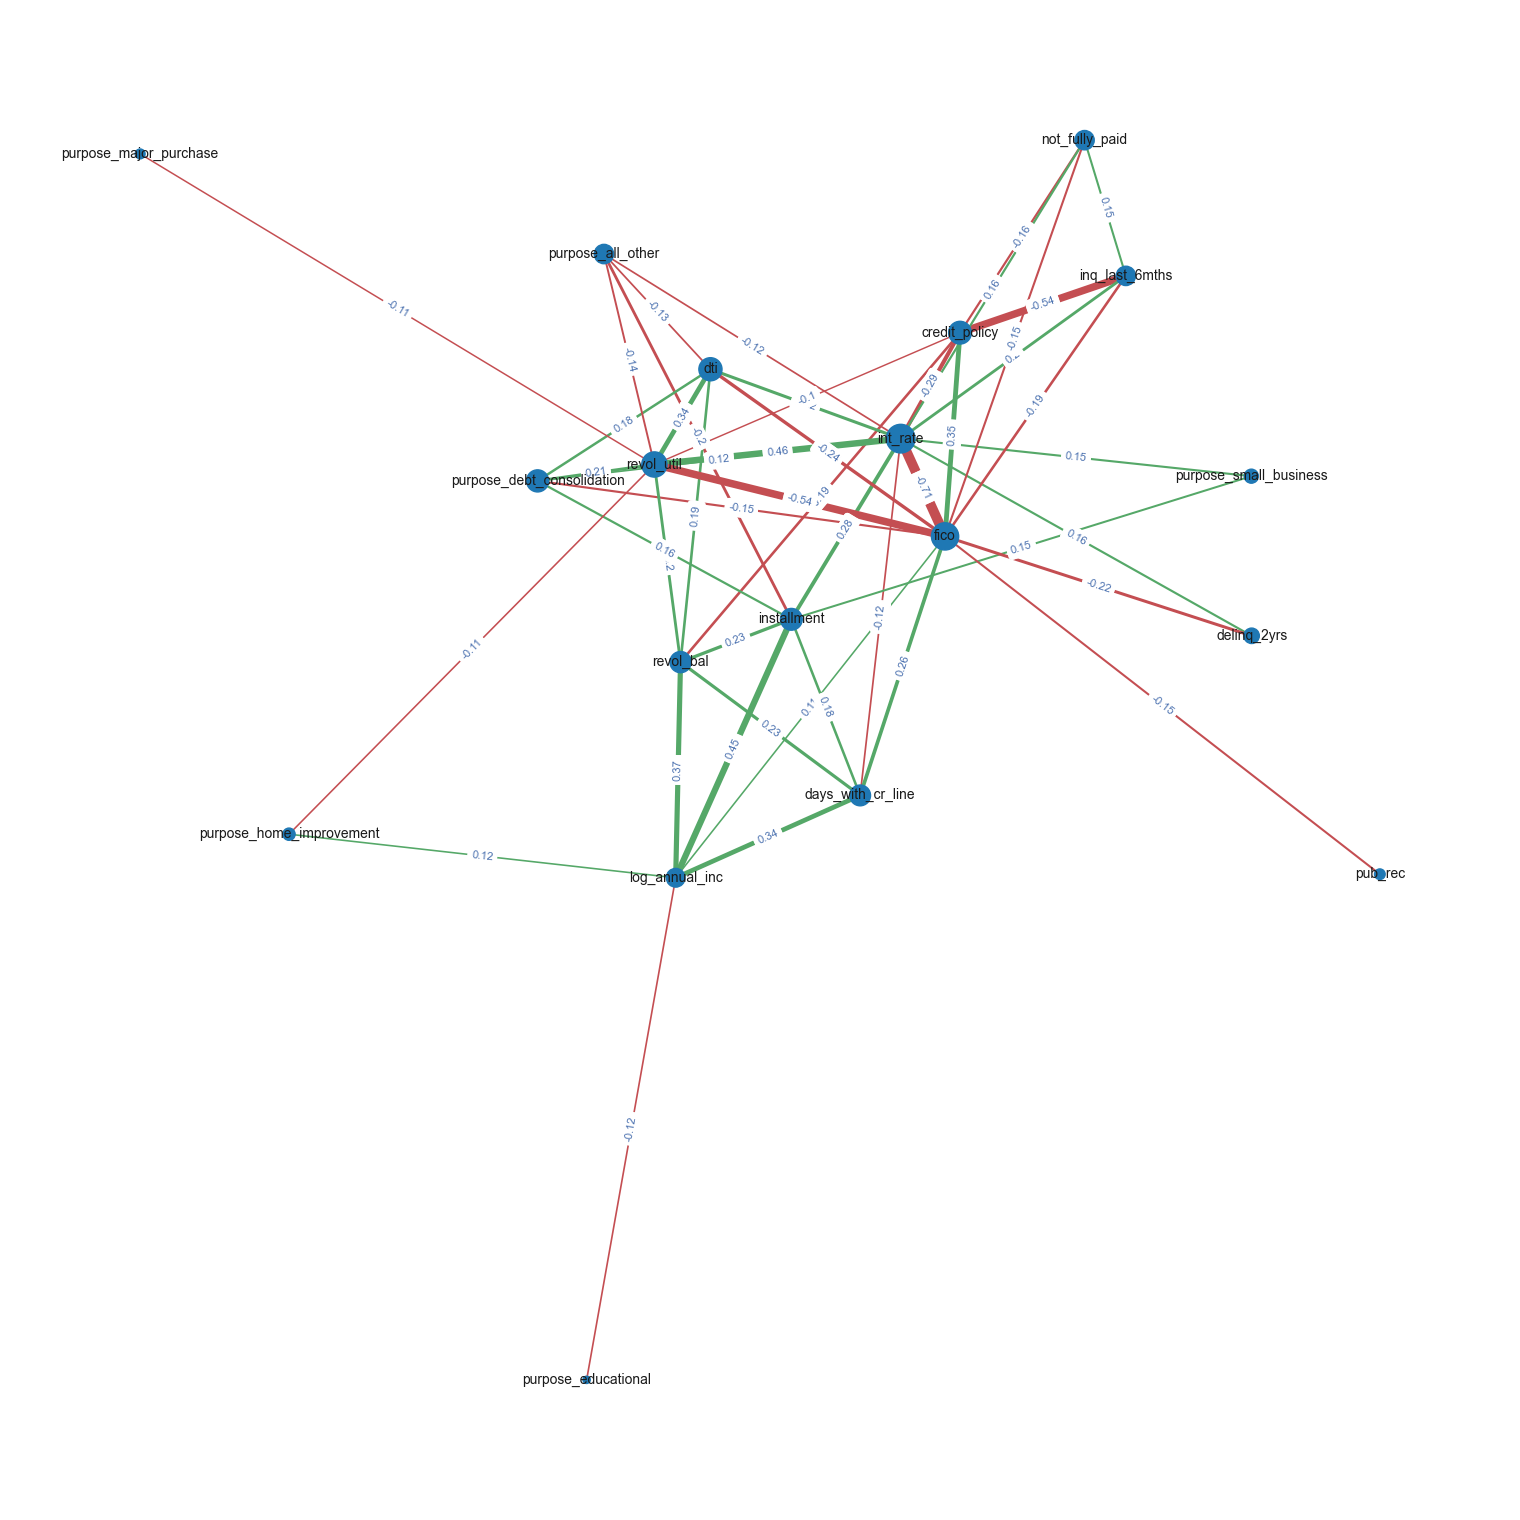

In [17]:
CorrelationFeatures.show_correlation_graph()

# Threshold = 0.2

In [18]:
CorrelationFeatures=ea.CorrelationFeatures(df_input=df,dummies_dict=dummies_dict).filter_correlations(threshold_absolute_correlation=0.2)

In [41]:
CorrelationFeatures.df_corr

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


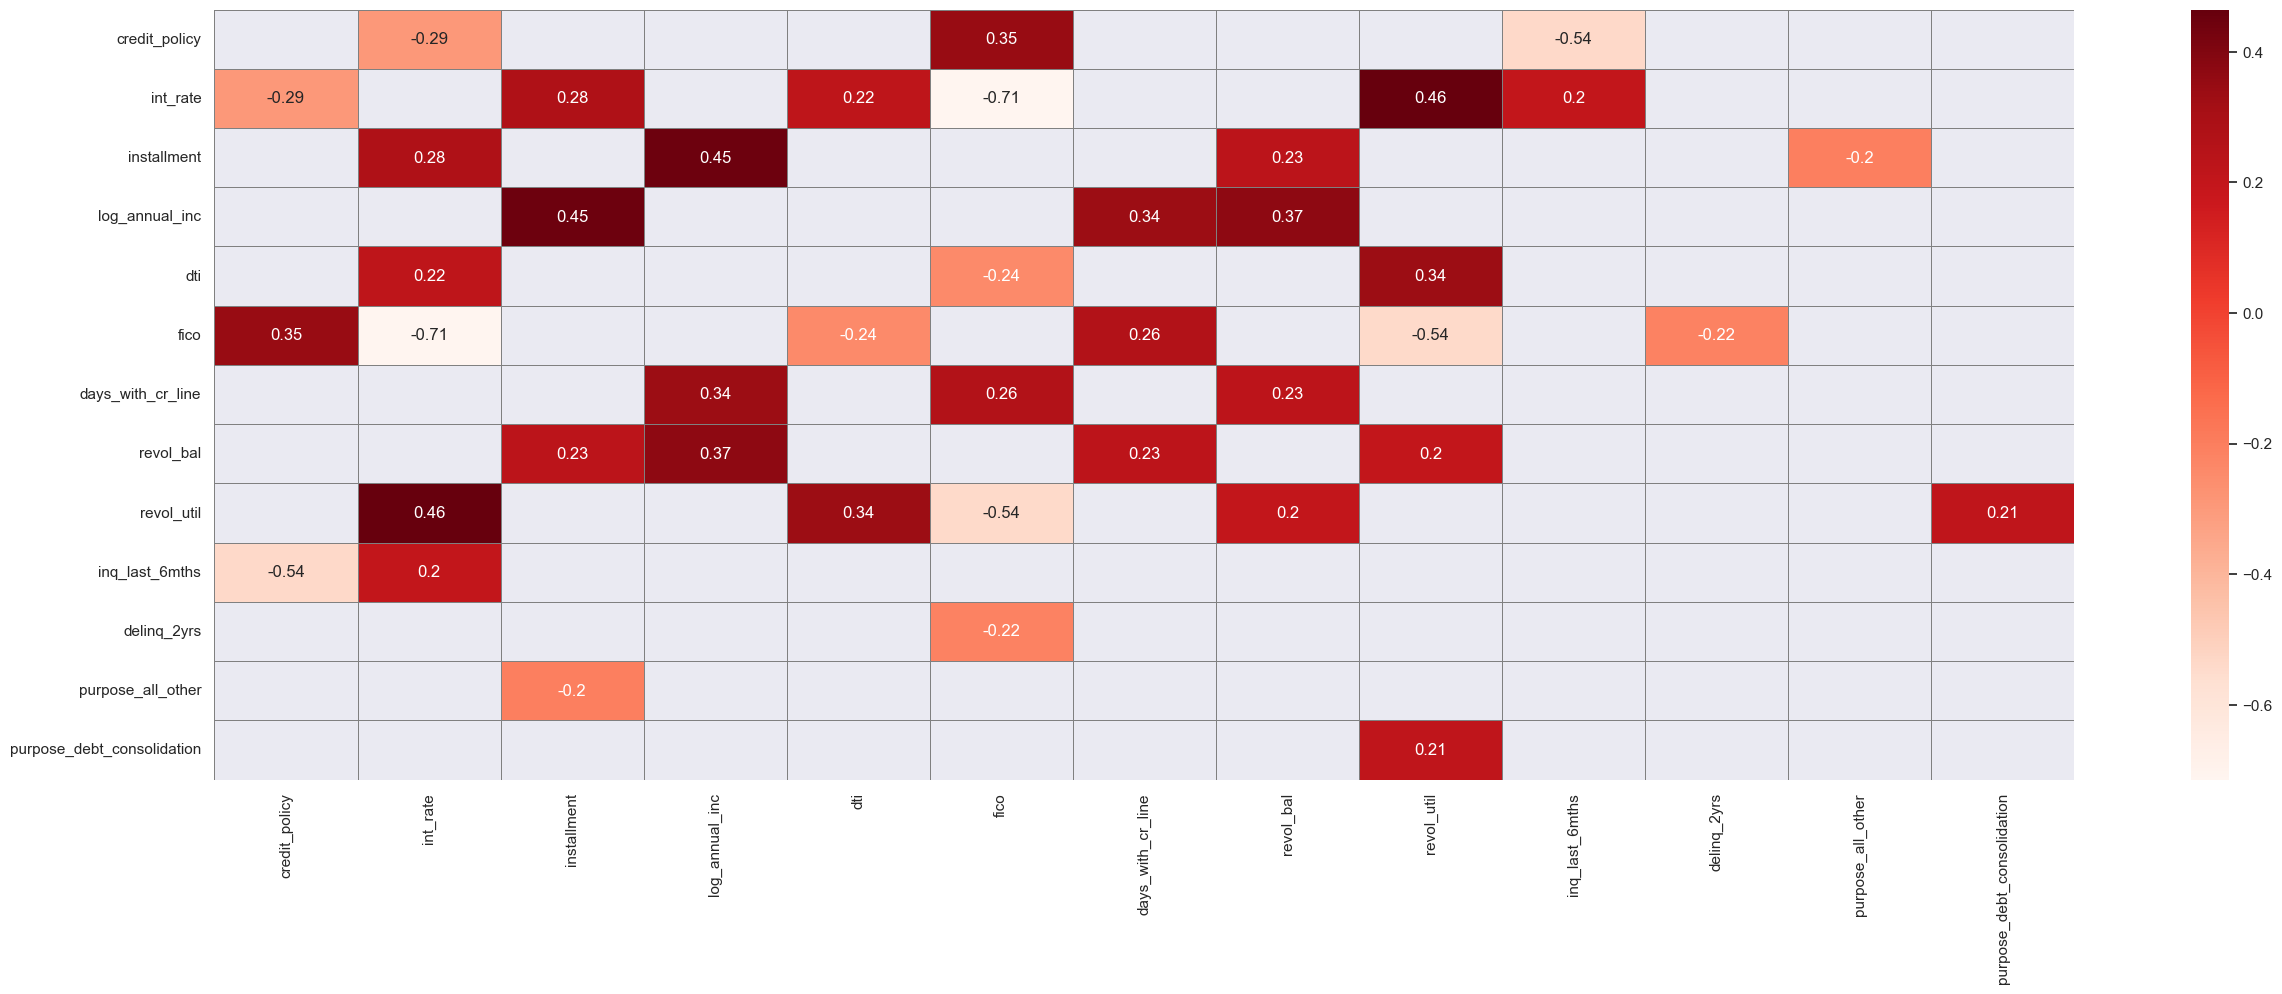

In [19]:
CorrelationFeatures.show_heat_map()

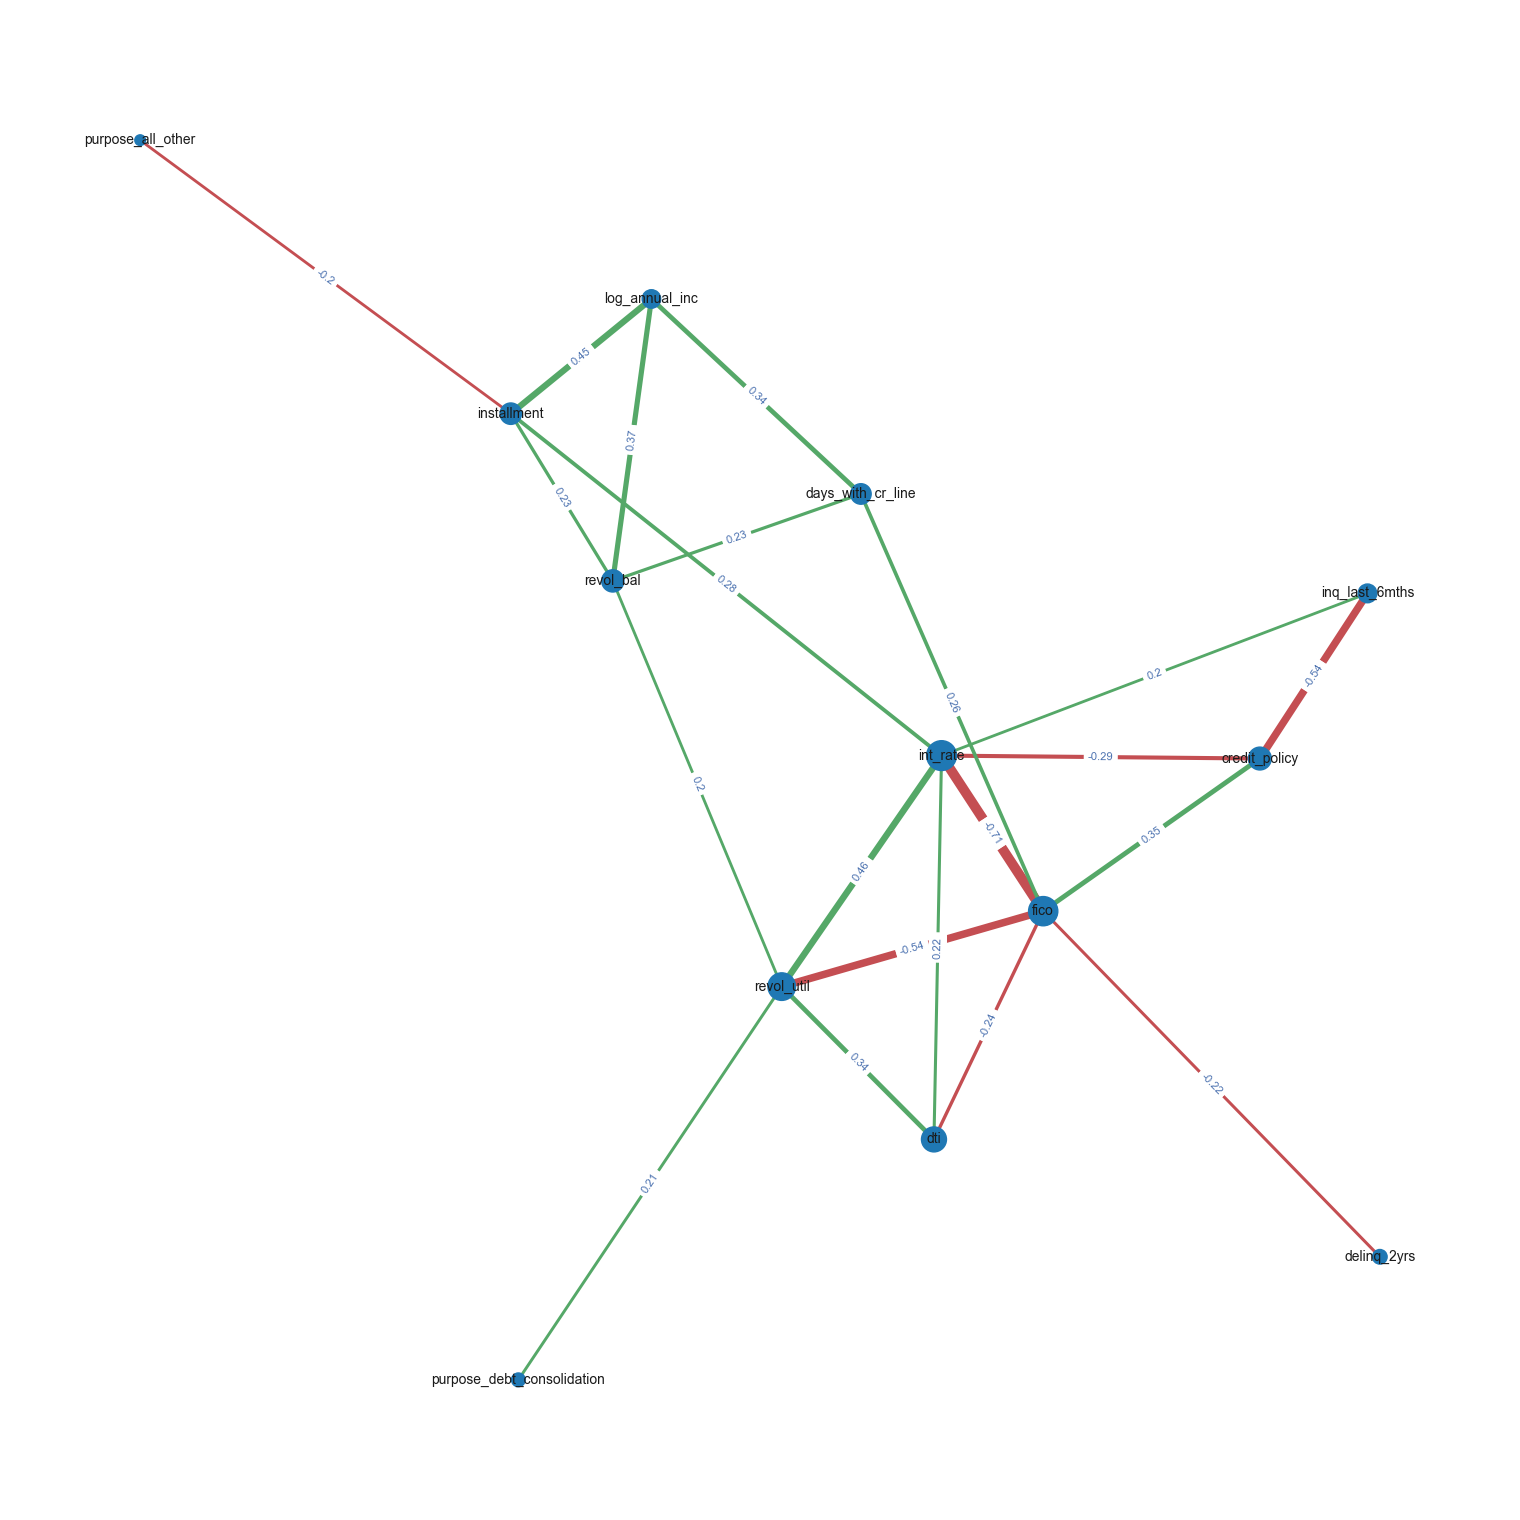

In [20]:
CorrelationFeatures.show_correlation_graph()

# Threshold = 0.3

In [21]:
CorrelationFeatures=ea.CorrelationFeatures(df_input=df,dummies_dict=dummies_dict).filter_correlations(threshold_absolute_correlation=0.3)

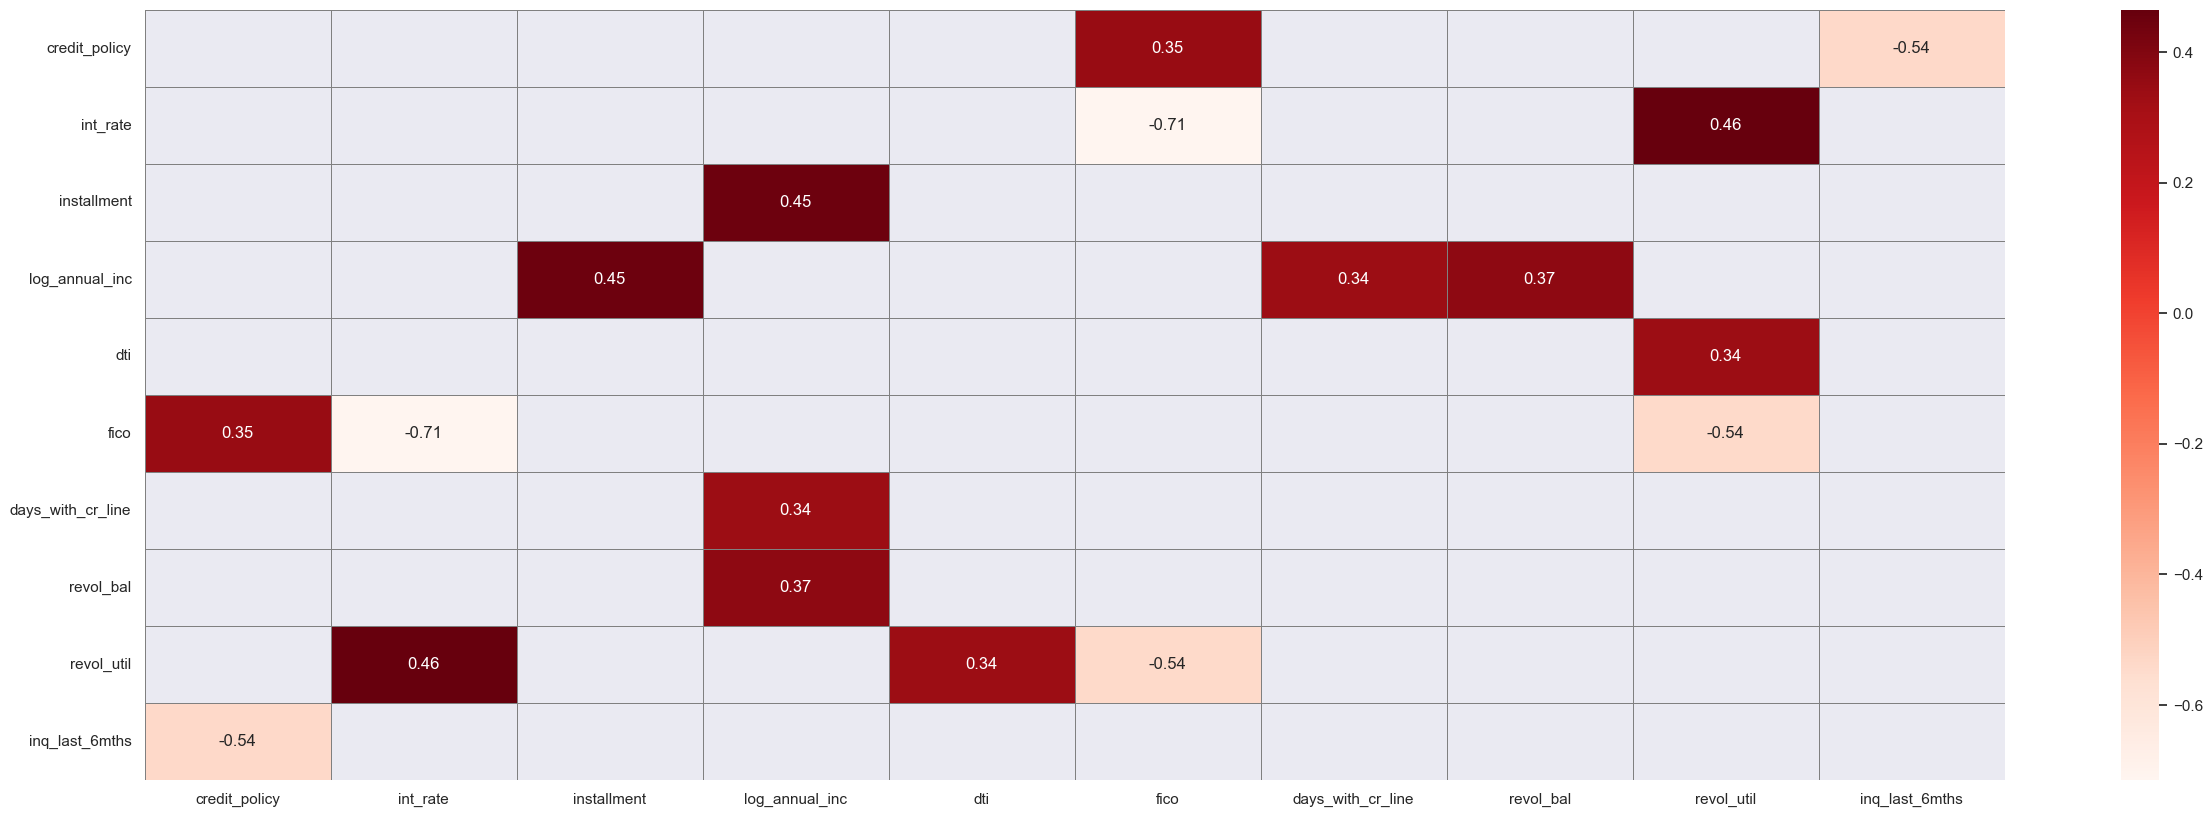

In [22]:
CorrelationFeatures.show_heat_map()

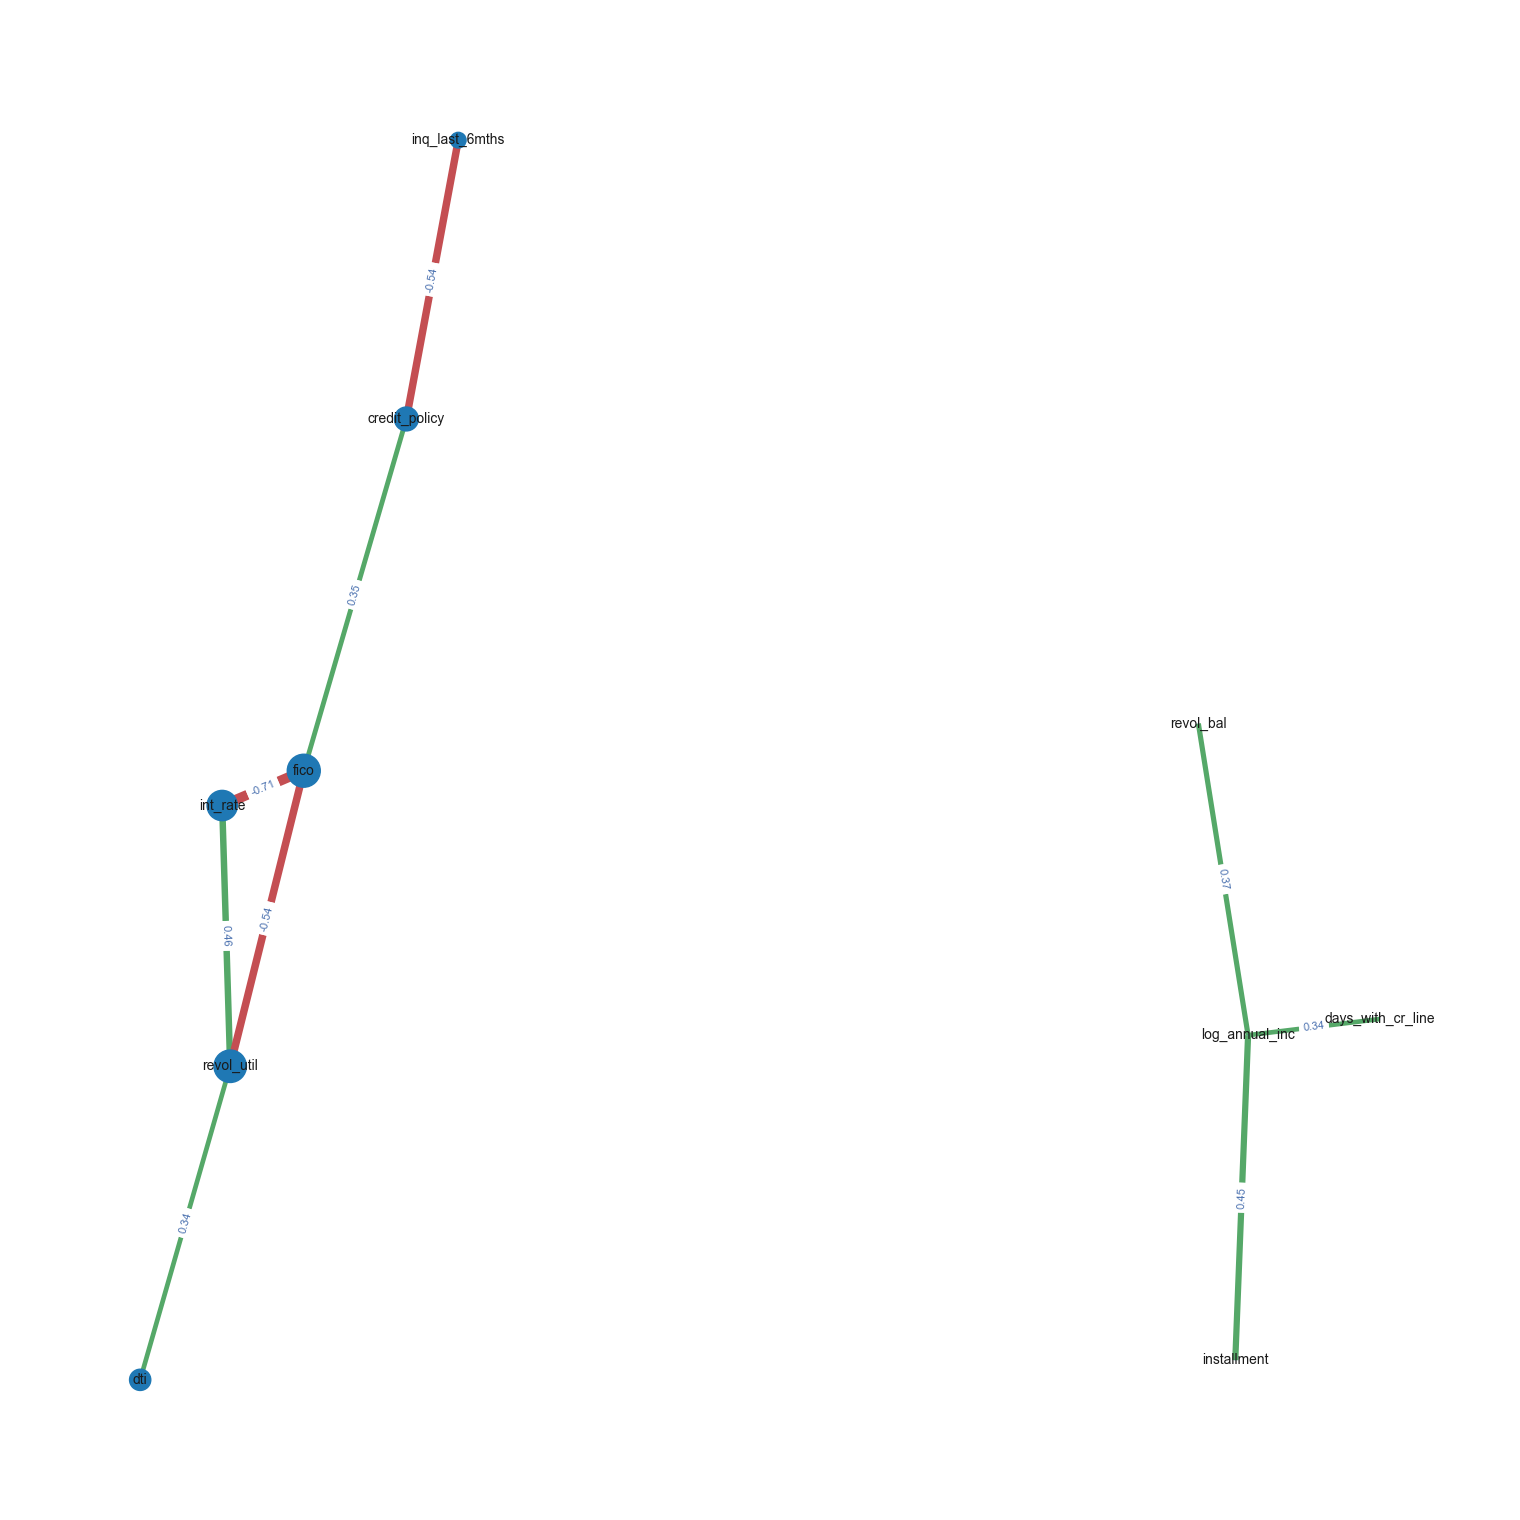

In [23]:
CorrelationFeatures.show_correlation_graph()

# Feature Selector

In [24]:
ea.FeatureSelector(df=df,target="delinq_2yrs",num_feature_keep=5).result_table

,column,scores,p_values
0,credit_policy,6.394701,6.991093e-10
1,int_rate,28.948137,1.974858e-55
2,installment,0.374547,9.580669e-01
3,log_annual_inc,1.499922,1.322902e-01
4,dti,1.579246,1.059234e-01
5,fico,55.481502,1.544891e-109
6,days_with_cr_line,8.068455,4.229472e-13
7,revol_bal,1.207909,2.799679e-01
8,revol_util,2.849740,1.519080e-03
9,inq_last_6mths,2.557589,4.391129e-03


In [25]:
ea.FeatureSelector(df=df,target="credit_policy",num_feature_keep=5).result_table

,column,scores,p_values
0,int_rate,906.625421,2.194562e-190
1,installment,33.188868,8.620920e-09
2,log_annual_inc,11.681916,6.337324e-04
3,dti,79.784915,4.945272e-19
4,fico,1322.238670,2.610042e-271
5,days_with_cr_line,94.834006,2.627126e-22
6,revol_bal,348.994363,1.592869e-76
7,revol_util,104.899885,1.717916e-24
8,inq_last_6mths,3850.285839,0.000000e+00
9,delinq_2yrs,56.102210,7.488466e-14


In [26]:
df.columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [43]:

score_data_raw=[]
for target in df.columns: 
    FeatureSelectorObject=ea.FeatureSelector(df=df,target=target)
    score_data_raw.extend(
        map(lambda x: (target,*x),list(zip(FeatureSelectorObject.features_names_selected,FeatureSelectorObject.scores/max(FeatureSelectorObject.scores)))))


In [47]:
df_scores=pd.DataFrame(score_data_raw, columns =['target', 'feature', 'score'])
df_scores

,target,feature,score
0,credit_policy,int_rate,0.235470
1,credit_policy,installment,0.008620
2,credit_policy,log_annual_inc,0.003034
3,credit_policy,dti,0.020722
4,credit_policy,fico,0.343413
...,...,...,...
375,purpose_small_business,purpose_credit_card,0.207260
376,purpose_small_business,purpose_debt_consolidation,1.000000
377,purpose_small_business,purpose_educational,0.050323
378,purpose_small_business,purpose_home_improvement,0.095452


In [52]:
test=df_scores.pivot_table(values='score', index=df_scores.target, columns='feature', aggfunc='first')

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

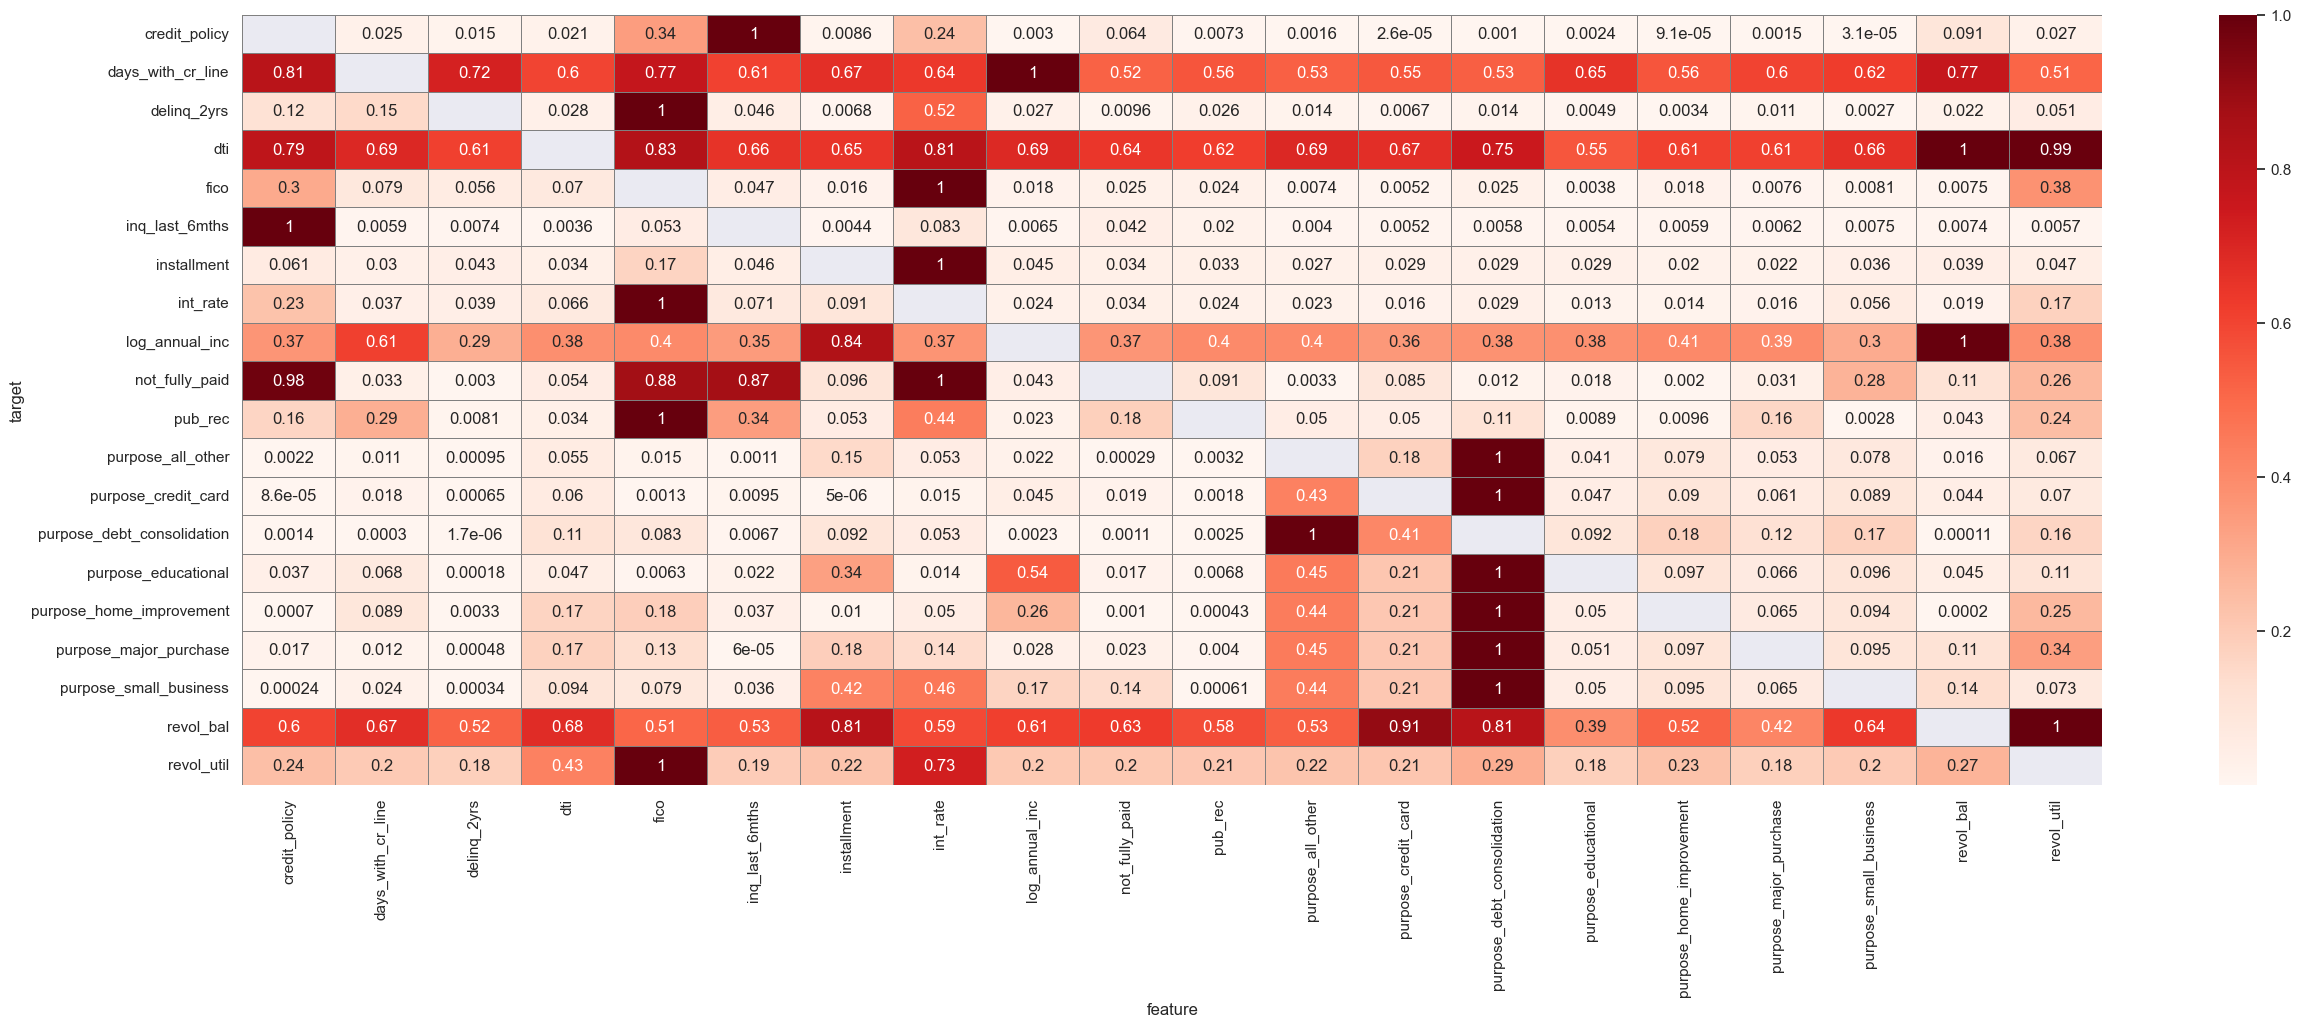

In [54]:
sns.set()
plt.figure(figsize=(30, 10))
sns.heatmap(
    test,
    annot=True,
    cmap="Reds",
    linewidths=0.5,
    linecolor="gray",
)
plt.show()

In [28]:
FeatureSelectorDelinq.support

array([ True,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [41]:
FeatureSelectorDelinq.features_names_selected

['credit_policy', 'int_rate', 'fico', 'days_with_cr_line', 'revol_util']

In [46]:
FeatureSelectorDelinq.scores/sum(FeatureSelectorDelinq.scores)

array([0.05604227, 0.25369743, 0.00328248, 0.01314511, 0.01384029,
       0.48623214, 0.07071082, 0.01058595, 0.02497473, 0.02241435,
       0.01287096, 0.00466922, 0.00678972, 0.00324668, 0.00658211,
       0.00237035, 0.00165356, 0.005587  , 0.00130484])

In [30]:
FeatureSelectorDelinq.features_names_selected

['credit_policy', 'int_rate', 'fico', 'days_with_cr_line', 'revol_util']